In [1]:
from IPython.display import Image
Image(url='http://imgs.xkcd.com/comics/data.png', width=400)

In [6]:
%connect_info

{
  "iopub_port": 39915,
  "signature_scheme": "hmac-sha256",
  "transport": "tcp",
  "kernel_name": "",
  "stdin_port": 57463,
  "hb_port": 47960,
  "key": "d8ab8a17-b50c-4e3d-af16-b492a62d7a8f",
  "shell_port": 56076,
  "ip": "127.0.0.1",
  "control_port": 47186
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a2806ca4-1d69-4284-ba5b-35e3285a24b3.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## Word2Vec

* Produces word embedding ($Words\rightarrow\mathbb{R}^{x}$)

* Uses a 2-layer neural network

* Words with similar meaning are mapped in close proximity

## Training

* Continuous Bag-of-Words:
    * $P(w_{t}\rvert w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2})$

* Continuous Skip-gram Model:
    * $P(w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2}\rvert w_{t})$

# Intuition
* I __eat__ an __apple__ every day
* I never __eat__ __banans__
* I like __driving__ my __car__

In [7]:
import matplotlib.pyplot as plt

def show_w2v(step=0):
    plt.style.use('bmh')
    plt.xkcd()
    fig, ax = plt.subplots(1, sharex=True, figsize=(10, 10))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # king
    ax.arrow(*(0, 0, .2, .7), head_width=0.025, head_length=0.04, 
                   fc='royalblue', ec='royalblue')
    ax.text(0.1, 0.6, 'King', fontsize=28)

    # queen
    ax.arrow(*(0, 0, .35, .5), head_width=0.025, head_length=0.04, 
                   fc='royalblue', ec='royalblue')    
    ax.text(0.20, 0.4, 'Queen', fontsize=28)
    
    if step > 0:
        # man
        ax.arrow(*(0, 0, .5, .3), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='forestgreen', ec='forestgreen')
        ax.text(0.25, 0.18, 'Man', fontsize=28)

        #woman
        ax.arrow(*(0, 0, .65, .11), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='forestgreen', ec='forestgreen')
        ax.text(0.35, 0.07, 'Woman', fontsize=28)
    
    if step > 1:
        # diff king queen
        ax.arrow(*(.38, .54, -.14, .17), alpha=1, head_width=0.025, head_length=0.04, 
                        fc='tomato', ec='tomato')
        ax.text(0.3, 0.65, r'$\Delta$', fontsize=28)

    if step > 2:
        # diff king queen
        ax.arrow(*(.7, .12, -.14, .17), alpha=1, head_width=0.025, head_length=0.04, 
                        fc='tomato', ec='tomato')
        ax.text(0.62, 0.225, r'$\Delta$', fontsize=28)
        
    if step > 3:
        ax.text(0.2, 0.8, 'King - Man + Woman = Queen', fontsize=28)
    
    plt.title('Basic Word2Vec Arithmetic')
    plt.show()

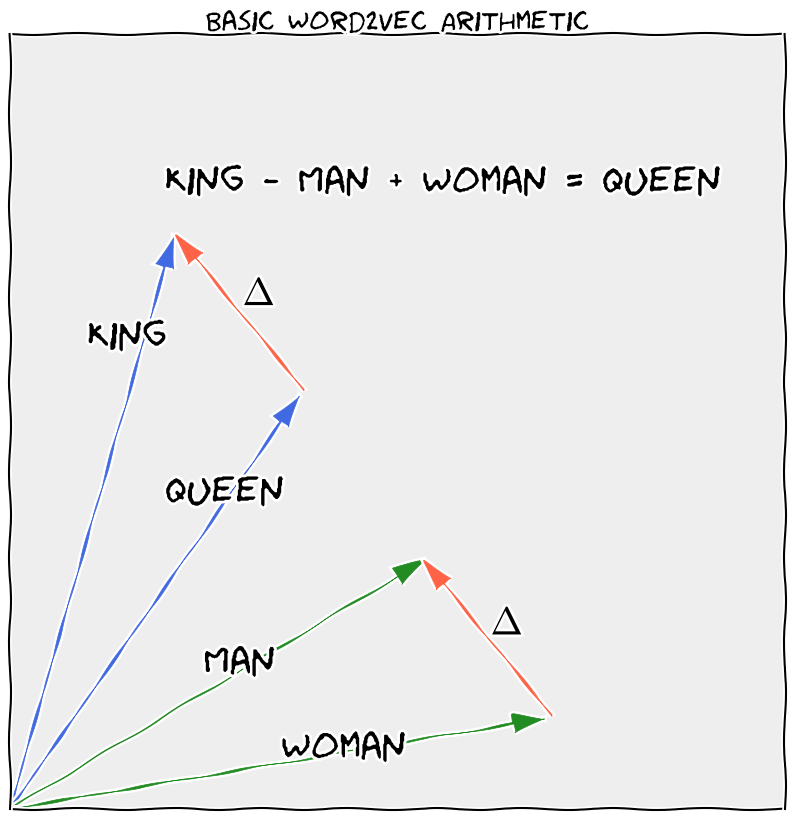

In [8]:
show_w2v(step=4)

# Load the model and the plaintext

In [9]:
import json
from gensim.models import Doc2Vec

modelPath = '../data/wiki_corpus/models/1000_dim_wiki_doc2vec.model'
model = Doc2Vec.load(modelPath)

plainPath = '../data/wiki_corpus/plain/all_articles.json'
plaintexts = {}
with open(plainPath, 'r') as fh:
    plaintexts = json.load(fh)

## Doc2Vec

* Build on top of Word2Vec

- Produces paragraph/document embedding

- Documents with shared context are mapped in close proximity

* Training: Like Word2Vec, but with a paragraph vector
    * $P(w_{t}\rvert \mathbf{pv}, w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2})$
    * $P(\mathbf{pv}, w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2}\rvert w_{t})$

In [10]:
# Find most similar
model.docvecs.most_similar('Angela Merkel')

[('Christian Democratic Union of Germany', 0.3579650819301605),
 ('German federal election, 2005', 0.3194369375705719),
 ('History of Germany since 1990', 0.28560686111450195),
 ('Edmund Stoiber', 0.2836201786994934),
 ('Karl-Theodor zu Guttenberg', 0.2786361873149872),
 ('Gerhard Schröder', 0.27858296036720276),
 ('Helmut Kohl', 0.2768113911151886),
 ('German federal election, 2009', 0.2723996341228485),
 ('Helmut Schmidt', 0.2715359330177307),
 ('Alliance for Germany', 0.26951926946640015)]

In [11]:
# Which one doesn't match?
model.docvecs.doesnt_match(['C++', 'Java (programming language)', 
                            'Go (programming language)', 'Tennis'])

'Tennis'

In [12]:
model.docvecs['Google']

array([  1.28242388e-01,  -3.00365537e-02,   9.06488672e-02,
        -1.49229288e-01,   9.99709442e-02,   4.93433811e-02,
         1.18923848e-02,  -7.79426396e-02,  -3.84137258e-02,
         9.42543149e-03,   3.69588193e-03,  -1.09578013e-01,
         8.13133344e-02,   6.47734152e-03,   1.30327430e-03,
        -1.51404534e-02,   2.80420724e-02,  -5.77417277e-02,
         5.41918054e-02,  -6.40752092e-02,  -3.48497145e-02,
         3.72104235e-02,  -2.26771983e-04,   6.48288652e-02,
        -4.19592299e-03,   2.30080839e-02,   6.44961372e-02,
        -2.40910351e-02,   6.27004653e-02,   7.69153088e-02,
        -8.03402737e-02,  -7.58571029e-02,   3.74206062e-03,
        -9.03628841e-02,   8.84812772e-02,  -5.52179813e-02,
        -1.14979103e-01,  -7.55930617e-02,   2.30942611e-02,
        -3.81688848e-02,  -7.27503076e-02,   6.31694496e-02,
         2.03665756e-02,   1.18991226e-01,   1.15856104e-01,
         2.51482781e-02,   3.26709710e-02,  -8.49265140e-03,
         2.36306898e-02,

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([model.docvecs['Angela Merkel']], 
                  [model.docvecs['Donald Trump']])

array([[ 0.15391563]], dtype=float32)

In [14]:
from sklearn.decomposition import RandomizedPCA
from sklearn.manifold import TSNE
import json
import pandas as pd

colormap = {
    'group from seattle': 'tomato',
    'ballgame': 'royalblue',
    'scientific constant': 'yellowgreen'
}        

# load the three categories data
three_categories = {}
with open('three_categories.json') as fh:
    three_categories = json.load(fh)

df = pd.DataFrame(index=three_categories.keys(), columns=[
        'category',
        'docvec',
        'reduced_docvec',
        'color'
    ])

# insert categories and colors
for k, v in three_categories.items():
    df.at[k, 'category'] = v
    df.at[k, 'color'] = colormap[v]
    df.at[k, 'docvec'] = model.docvecs[k]

# reduce data
doc_vecs_reduced = RandomizedPCA(n_components=50, random_state=0).fit_transform(list(df['docvec']))
doc_vecs_reduced = TSNE(perplexity=40, init='pca', n_components=2, verbose=1, random_state=0).fit_transform(doc_vecs_reduced)

# insert into dataframe
for k, v in zip(df.index, doc_vecs_reduced):
    df.at[k, 'reduced_docvec'] = v


/home/user/projekte/anaconda3/envs/ipynb/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 433 / 433
[t-SNE] Mean sigma: 0.754095
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.855510
[t-SNE] Error after 175 iterations: 0.855510


In [15]:
%pylab inline
from matplotlib import pyplot as plt

def plot_three_categories(colored=False):   
    # plot
    plt.style.use('bmh')
    plt.xkcd()

    fig, ax = plt.subplots(1, sharex=True, figsize=(16,9))

    a = .5
    s = 100
    
    legend_entries = {}
    for docvec, color, category in zip(df['reduced_docvec'], df['color'], df['category']):
        if colored == False:
            color = 'b'
        artist = ax.scatter(docvec[0], docvec[1], s=s, alpha=a, c=color, cmap=plt.cm.Spectral)
        legend_entries[category] = artist
            
    ax.set_title('Three Categories')

    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    artists, category = ([x for _, x in legend_entries.items()], [x for x, _ in legend_entries.items()])
    plt.legend(artists, category, loc=2)
    
    plt.show()

Populating the interactive namespace from numpy and matplotlib


## Articles From Three Random Wikipedia Categories 

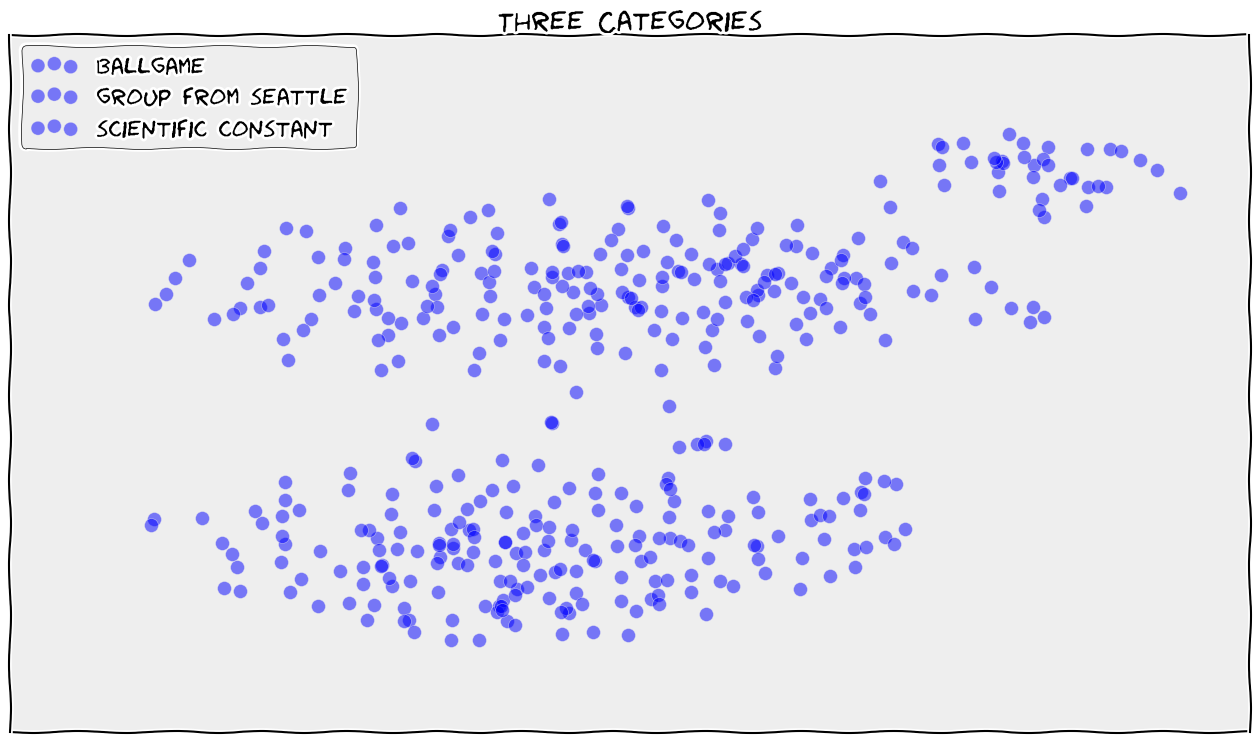

In [16]:
plot_three_categories(colored=False)

# Bokeh (thus interactive) version of the previous plot

In [17]:
import numpy as np

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook

def plot_three_categories_bokeh():
    TOOLS="pan,wheel_zoom,box_zoom,reset"
    colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
                "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

    doc_source = ColumnDataSource(data=
            dict(
                x = [x[0] for x in df['reduced_docvec'].values],
                y = [x[1] for x in df['reduced_docvec'].values],
                name = df.index,
                category = df['category'],
            )
        )

    tooltips = HoverTool(
            tooltips=[
                ("Category", "@category"),
                ("Name", "@name"),
                ("Index", "$index"),
                ("(x,y)", "(@x, @y)"),
            ]
        )

    p = figure(plot_width=900, plot_height=600, tools=[tooltips, TOOLS],
               title='Three Categories')

    p.scatter('x', 'y', radius=0.5, fill_alpha=.5, fill_color=df['color'],
             line_color=None,source=doc_source)

    p.background_fill_color= "#eeeeee"
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    output_notebook()
    show(p)  # open a browser

In [18]:
plot_three_categories_bokeh()

Loading BokehJS ...

# Thoughts

* ### The Doc2Vec model treats word vectors and document vectors equally

* ### In a given model, document vectors and word vectors are of the same dimensionality. Hence, I do arithmetic on them!


# Questions


* ## Are the living in the same space?

* ## Can a document by reproduceed by adding the "right" words?

* ## Can a document be approximated by another document plus the "right" words?

In [19]:
import matplotlib.pyplot as plt

def plot_wd2v(step=0):
    plt.style.use('bmh')
    plt.xkcd()
    fig, ax = plt.subplots(1, sharex=True, figsize=(10, 10))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    legend_data = {}
    # newton
    newton = ax.arrow(*(0, 0, .05, .45), head_width=0.025, head_length=0.04, 
                   fc='royalblue', ec='royalblue')
    legend_data['Document'] = newton
    ax.text(0.02, 0.35, 'Isaac \nNewton', fontsize=24)

    # einstein
    ax.arrow(*(0, 0, .70, .75), head_width=0.025, head_length=0.04, 
                   fc='royalblue', ec='royalblue')    
    ax.text(0.55, 0.63, 'Albert \nEinstein', fontsize=24)
    
    if step > 0:
        # + relativity
        relativity = ax.arrow(*(.05, .49, .19, .05), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='tomato', ec='tomato')
        legend_data['Word'] = relativity
        ax.text(0.04, 0.52, 'Relativity', fontsize=20)
        ax.text(0.02, .95, 'Isaac Newton + Relativity', fontsize=18)
   
    if step > 1:
        # + Ulm
        ax.arrow(*(.28, .55, .25, -.1), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='tomato', ec='tomato')
        ax.text(0.35, 0.5, 'Ulm', fontsize=20)
        ax.text(0.02, .95, 'Isaac Newton + Relativity + Germany', fontsize=18)

    if step > 2:
        # + Nobel
        ax.arrow(*(.57, .44, -.1, .2), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='tomato', ec='tomato')
        ax.text(0.53, 0.5, 'Nobel', fontsize=20)
        ax.text(0.02, .95, 'Isaac Newton + Relativity + Germany + Nobel', fontsize=18)
        
    if step > 3:
        # + Refugee
        ax.arrow(*(.45, .68, .2, .1), alpha=1, head_width=0.025, head_length=0.04, 
                 fc='tomato', ec='tomato')
        ax.text(0.5, 0.73, 'Refugee', fontsize=20)
        ax.text(0.02, .95, 'Isaac Newton + Relativity + Germany + Nobel + Refugee = Albert Einstein?', fontsize=18)

    plt.legend(legend_data.values(), legend_data.keys(),  loc=4)
    plt.title('Mix Arithmetic')
    plt.show()

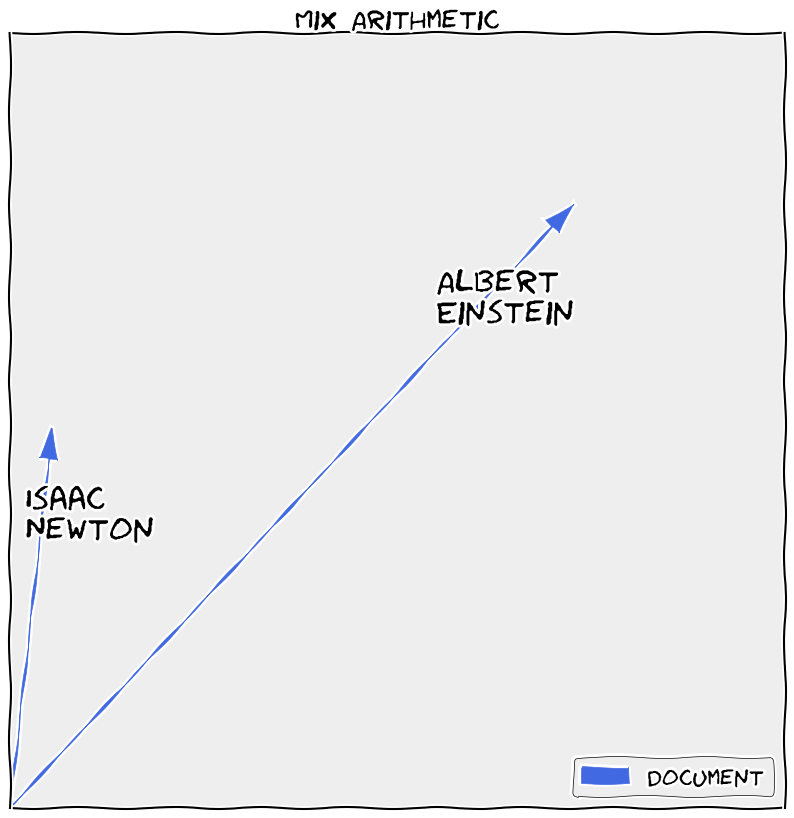

In [20]:
plot_wd2v(step=0)

In [21]:
import pickle
import matplotlib.pyplot as plt

def plot_word_doc_same_space():
    plt.style.use('bmh')
    plt.xkcd()

    X_reduced = ""
    with open('wiki_subsample.pkl', 'rb') as fh:
        X_reduced = pickle.load(fh)
    num_words = 5000

    a = .2
    s = 20

    fig, ax = plt.subplots(1, sharex=True, figsize=(10, 10))

    doc_artist = ax.scatter(X_reduced[num_words:, 0], X_reduced[num_words:, 1], s=s, 
                            alpha=a, c='b', label='Document', cmap=plt.cm.Spectral)
    word_artist = ax.scatter(X_reduced[:num_words, 0], X_reduced[:num_words, 1], s=s, 
                alpha=a, c='r', label='Words', cmap=plt.cm.Spectral)
    ax.set_title('Doc2Vec vs Word2Vec arrangement')

    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.legend([doc_artist, word_artist], ['Documents', 'Words'])

    plt.show()

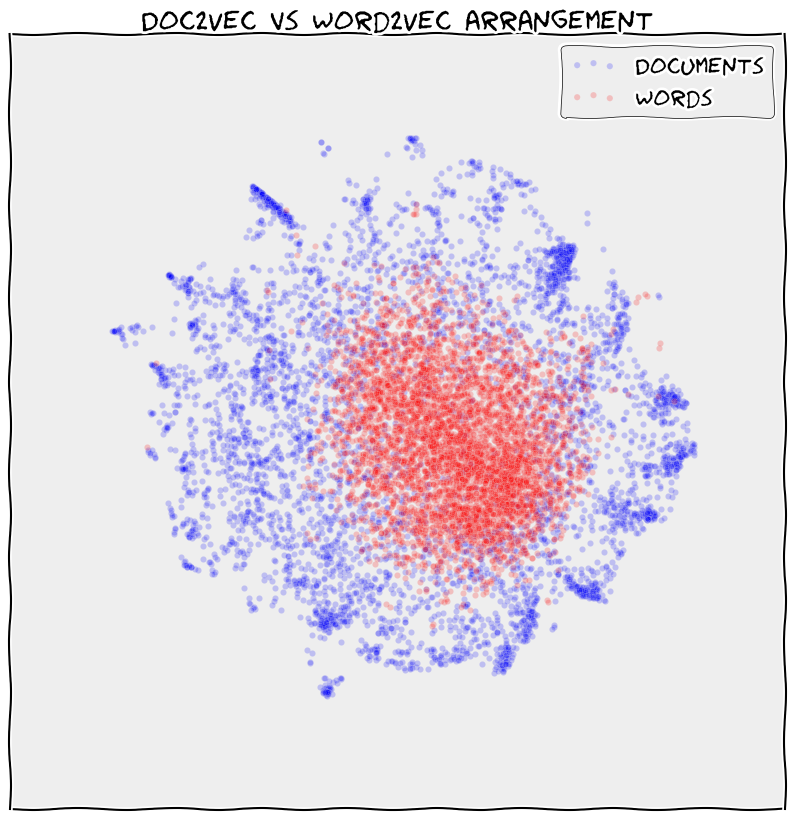

In [22]:
plot_word_doc_same_space()

In [23]:
Image(url='https://i.ytimg.com/vi/G_yahranAnQ/maxresdefault.jpg')